In [1]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
q, γ = 1/4, 1/2
def compute_rel_rev(q, γ):
    p0, p0_star, p1 = 1/(1 + 2 * q - q**2), q/(1 + 2 * q - q**2), (1-q) * q / (1 + 2 * q - q**2) 
    B = (1 - q) * γ * p0_star + 2 * q * p0_star + 2 * p1 * q 
    C = p0 * (1-q) + p0_star * (1-q) * γ + 2 * p0_star * (1-q) * (1-γ)  
    return(B/(B + C) -q)

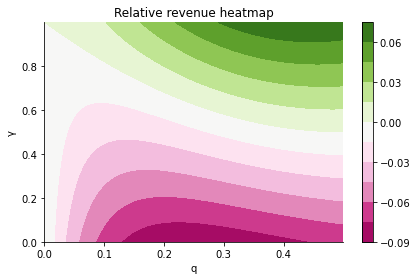

In [34]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np


# make these smaller to increase the resolution
dx, dy = 0.001, 0.001

# generate 2 2d grids for the x & y bounds
q, γ = np.mgrid[slice(0, 1/2, dy),
                slice(0, 1, dx)]

z = compute_rel_rev(q, γ)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig,  ax1 = plt.subplots()

# im = ax0.pcolormesh(q, γ, z, cmap=cmap, norm=norm)
# fig.colorbar(im, ax=ax0)
# ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(q[:-1, :-1] + dx/2.,
                  γ[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
ax1.set_title('Relative revenue heatmap')
ax1.set_xlabel('q')
ax1.set_ylabel('γ')
# set the limits of the plot to the limits of the data
ax1.axis([q.min(), q.max(), γ.min(), γ.max()])

fig.tight_layout()
sns.despine()
plt.savefig('../../Figures/relative_rev_map.pdf')


plt.show()

-0.07671320486001368

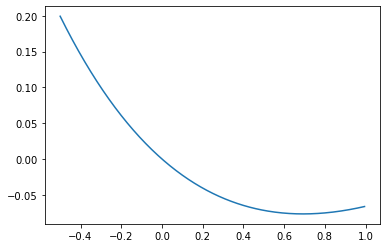

In [55]:
p, λ, b = 1/4, 2, 1
c = (1-0.5) * p * λ * b
def CL_equation(θ):
    return(θ * c + p * λ *(np.exp(- b * θ) - 1))
θ = np.arange(-0.5, 1, 0.005)
plt.plot(θ, CL_equation(θ))
CL_equation(np.log(p * λ * b / c) / b)